In [1]:
using GraphViz

using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

# Model A: Open population SIR model

In [2]:
sir = @stock_and_flow begin

    :stocks
    S
    I 
    R 

    :parameters
    rbirth
    cbeta
    rrecovery
    rdeath

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta
    v_inf₃ =  v_inf₂ * S

    :flows
    CLOUD => f_birth(rbirth * N) => S 
    S => f_inf(v_inf₃) => I 
    I => f_rec(rrecovery * I) => R
    S => f_deathS(S * rdeath) => CLOUD
    I => f_deathI(I * rdeath) => CLOUD
    R => f_deathR(R * rdeath) => CLOUD
    

    :sums
    N = [I, R, S]

end

StockAndFlowF {S:3, SV:1, LS:3, F:6, I:3, O:5, V:8, LV:6, LSV:2, P:4, LVV:2, LPV:6, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────┐
│ F │ fv │    fname │
├───┼────┼──────────┤
│ 1 │  4 │  f_birth │
│ 2 │  3 │    f_inf │
│ 3 │  5 │    f_rec │
│ 4 │  6 │ f_deathS │
│ 5 │  7 │ f_deathI │
│ 6 │  8 │ f_deathR │
└───┴────┴──────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
└───┴─────┴────┘
┌───┬──────────────────┬─────┐
│ V │            vname │ vop │
├───┼──────────────────┼─────┤
│ 1 │           v_inf₁ │   / │
│ 2 │           v_inf₂ │   * │
│ 3 │           v_inf₃ │   * │
│ 4 │  ##v_f_birth#292 │   * │
│ 5 │    ##v_f_rec#293 │   * │
│ 6 │ ##v_f_deathS#294 │   * │
│ 7 │ ##v_f_deathI#295 │   * │
│ 8 │ ##v_f_deathR#296 │   * │
└───┴──────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           1 │
│  2 │   1 │   3 │           2 │
│  3 │   2 │   5 │           2 │
│  4 │   1 │   6 │           1 │
│  5 │   2 │   7 │           1 │
│  6 │   3 │   8 │           1 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
│   2 │     1 │    4 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬───────────┐
│ P │     pname │
├───┼───────────┤
│ 1 │    rbirth │
│ 2 │     cbeta │
│ 3 │ rrecovery │
│ 4 │    rdeath │
└───┴───────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
│   2 │     2 │     3 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    2 │    2 │            2 │
│   2 │    1 │    4 │            1 │
│   3 │    3 │    5 │            1 │
│   4 │    4 │    6 │            2 │
│   5 │    4 │    7 │            2 │
│   6 │    4 │    8 │            2 │
└─────┴──────┴──────┴──────────────┘

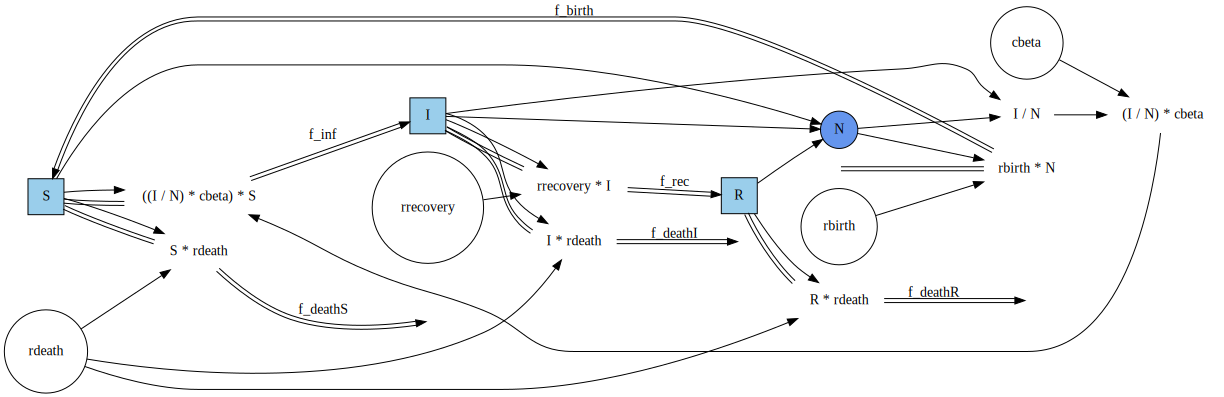

In [3]:
GraphF(sir)

# Model B: Open population SVI model

In [4]:
svi = @stock_and_flow begin
    
    :stocks
    S
    V
    I

    :parameters
    rvaccine
    rdeath
    lambda
    evaccine_complement # 1.0 - evaccine

    :dynamic_variables
    v_vacV = evaccine_complement * V
    v_infV = v_vacV * lambda

    
    :flows
    S => f_vacc(S * rvaccine) => V
    V => f_deathV(V * rdeath) => CLOUD
    V => f_infV(v_infV) => I 

    :sums
    N = [V, I, S]

end

StockAndFlowF {S:3, SV:1, LS:3, F:3, I:2, O:3, V:4, LV:3, LSV:0, P:4, LVV:1, LPV:4, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     V │
│ 3 │     I │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────┐
│ F │ fv │    fname │
├───┼────┼──────────┤
│ 1 │  3 │   f_vacc │
│ 2 │  4 │ f_deathV │
│ 3 │  2 │   f_infV │
└───┴────┴──────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   3 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  2 │
└───┴─────┴────┘
┌───┬──────────────────┬─────┐
│ V │            vname │ vop │
├───┼──────────────────┼─────┤
│ 1 │           v_vacV │   * │
│ 2 │           v_infV │   * │
│ 3 │   ##v_f_vacc#297 │   * │
│ 4 │ ##v_f_deathV#298 │   * │
└───┴──────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           2 │
│  2 │   1 │   3 │           1 │
│  3 │   2 │   4 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬─────────────────────┐
│ P │               pname │
├───┼─────────────────────┤
│ 1 │            rvaccine │
│ 2 │              rdeath │
│ 3 │              lambda │
│ 4 │ evaccine_complement │
└───┴─────────────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    4 │    1 │            1 │
│   2 │    3 │    2 │            2 │
│   3 │    1 │    3 │            2 │
│   4 │    2 │    4 │            2 │
└─────┴──────┴──────┴──────────────┘

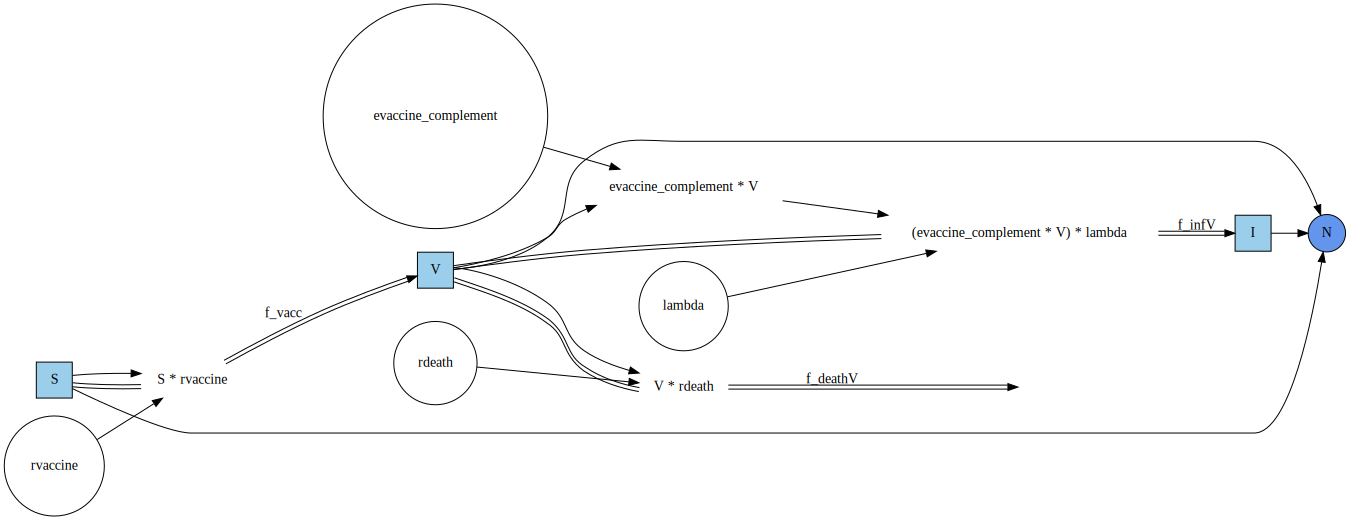

In [5]:
GraphF(svi)

# Composition 

## Using UWD-algebra

### 1. Compose two diagrams with stocks, sum dynamic variables, and links between them first

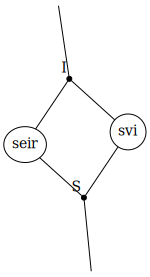

In [6]:
# define the UWD-algebra
sirv_uwd = @relation (S,I) begin
    seir(S,I)
    svi(S,I)
end;
display_uwd(sirv_uwd)

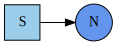

In [7]:
# define a foot of the structured multicospan
footS=foot(:S, :N, :S=>:N)
GraphF(footS;schema="C0")
     

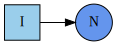

In [8]:
# define a foot of the structured multicospan
footI=foot(:I, :N, :I=>:N)
GraphF(footI;schema="C0")
     

In [9]:
# open sir and svi stock and flow diagram with the feet defined before
open_sir=Open(sir, footS, footI)
open_svi=Open(svi, footS, footI)
# Compose those two models according the UWD-algebra
open_sirv = oapply(sirv_uwd, [open_sir, open_svi])
# the composed stock and flow diagram is the apex of the composed open stock and flow diagram
sirv = apex(open_sirv)

StockAndFlowF {S:4, SV:1, LS:4, F:9, I:5, O:8, V:12, LV:9, LSV:2, P:8, LVV:3, LPV:10, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
│ 4 │     V │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────┐
│ F │ fv │    fname │
├───┼────┼──────────┤
│ 1 │  4 │  f_birth │
│ 2 │  3 │    f_inf │
│ 3 │  5 │    f_rec │
│ 4 │  6 │ f_deathS │
│ 5 │  7 │ f_deathI │
│ 6 │  8 │ f_deathR │
│ 7 │ 11 │   f_vacc │
│ 8 │ 12 │ f_deathV │
│ 9 │ 10 │   f_infV │
└───┴────┴──────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   7 │  4 │
│ 5 │   9 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   4 │  1 │
│ 3 │   3 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  1 │
│ 7 │   8 │  4 │
│ 8 │   9 │  4 │
└───┴─────┴────┘
┌────┬──────────────────┬─────┐
│  V │            vname │ vop │
├────┼──────────────────┼─────┤
│  1 │           v_inf₁ │   / │
│  2 │           v_inf₂ │   * │
│  3 │           v_inf₃ │   * │
│  4 │  ##v_f_birth#292 │   * │
│  5 │    ##v_f_rec#293 │   * │
│  6 │ ##v_f_deathS#294 │   * │
│  7 │ ##v_f_deathI#295 │   * │
│  8 │ ##v_f_deathR#296 │   * │
│  9 │           v_vacV │   * │
│ 10 │           v_infV │   * │
│ 11 │   ##v_f_vacc#297 │   * │
│ 12 │ ##v_f_deathV#298 │   * │
└────┴──────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           1 │
│  2 │   1 │   3 │           2 │
│  3 │   2 │   5 │           2 │
│  4 │   1 │   6 │           1 │
│  5 │   2 │   7 │           1 │
│  6 │   3 │   8 │           1 │
│  7 │   4 │   9 │           2 │
│  8 │   1 │  11 │           1 │
│  9 │   4 │  12 │           1 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
│   2 │     1 │    4 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬─────────────────────┐
│ P │               pname │
├───┼─────────────────────┤
│ 1 │              rbirth │
│ 2 │               cbeta │
│ 3 │           rrecovery │
│ 4 │              rdeath │
│ 5 │            rvaccine │
│ 6 │              rdeath │
│ 7 │              lambda │
│ 8 │ evaccine_complement │
└───┴─────────────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
│   2 │     2 │     3 │             1 │
│   3 │     9 │    10 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    2 │    2 │            2 │
│   2 │    1 │    4 │            1 │
│   3 │    3 │    5 │            1 │
│   4 │    4 │    6 │            2 │
│   5 │    4 │    7 │            2 │
│   6 │    4 │    8 │            2 │
│   7 │    8 │    9 │            1 │
│   8 │    7 │   10 │            2 │
│   9 │    5 │   11 │            2 │
│  10 │    6 │   12 │            2 │
└─────┴──────┴──────┴──────────────┘

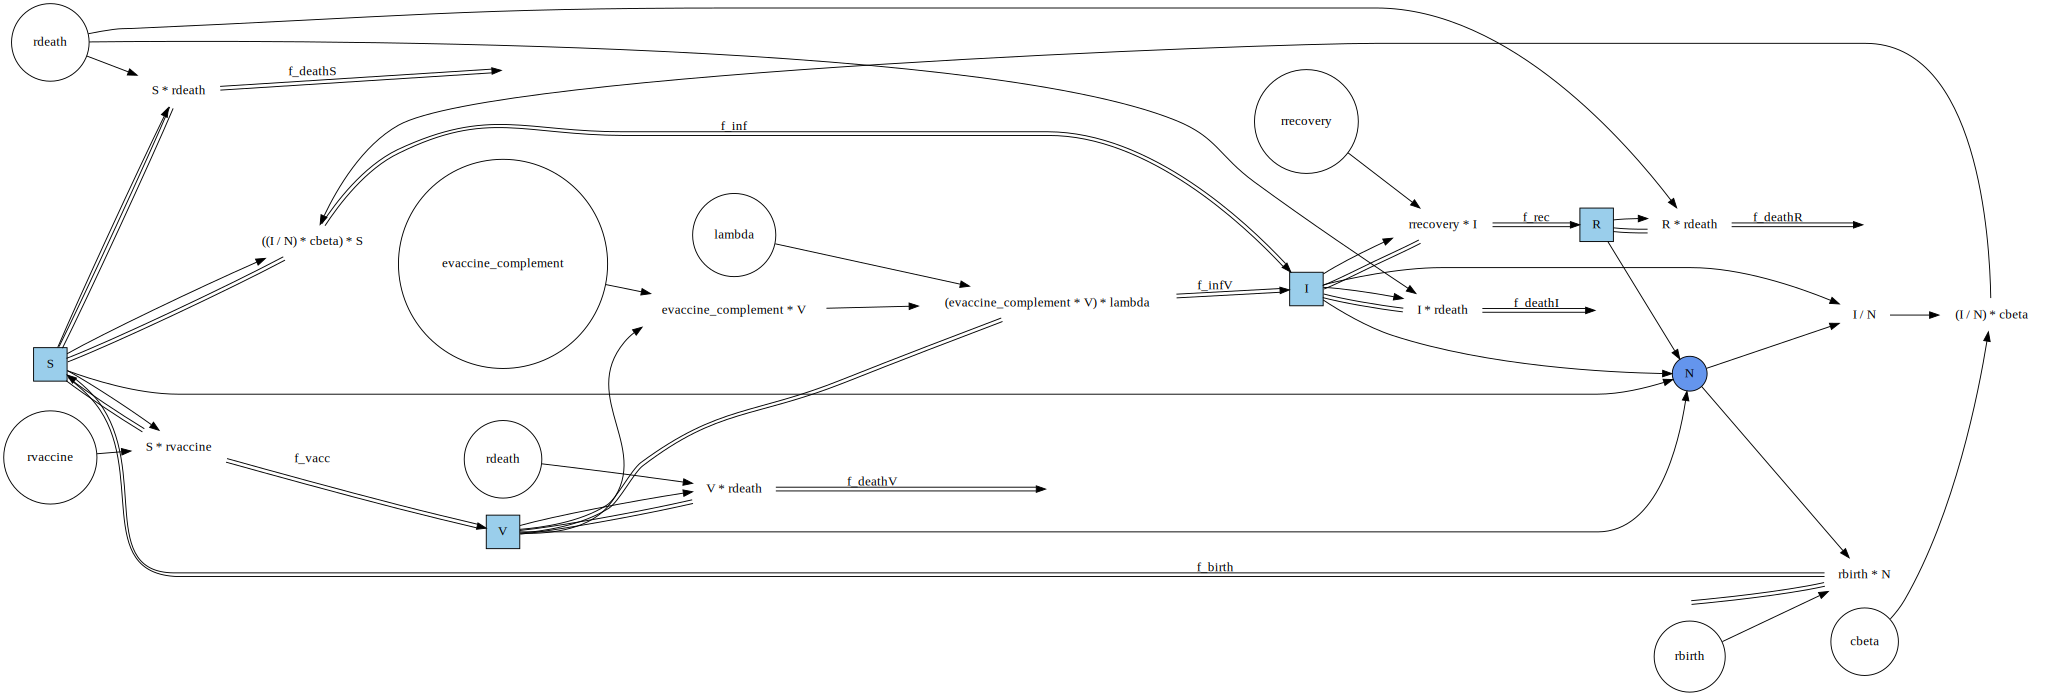

In [10]:
GraphF(sirv)


### 2. Graph Rewriting



#### NOTE: all the parts in the L, I and R (especially the attributes) should be the same as the SIRV diagram, or the natrual transformation will not be natural.

In [11]:
L = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    lambda
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta
    
    v_vacV = evaccine_complement * V


    v_infV = v_vacV * lambda


    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;
     


StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:4, LV:2, LSV:1, P:3, LVV:2, LPV:3, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     V │
│ 2 │     I │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  4 │ f_infV │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
└───┴─────┴────┘
┌───┬────────┬─────┐
│ V │  vname │ vop │
├───┼────────┼─────┤
│ 1 │ v_inf₁ │   / │
│ 2 │ v_inf₂ │   * │
│ 3 │ v_vacV │   * │
│ 4 │ v_infV │   * │
└───┴────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           1 │
│  2 │   1 │   3 │           2 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬─────────────────────┐
│ P │               pname │
├───┼─────────────────────┤
│ 1 │              lambda │
│ 2 │               cbeta │
│ 3 │ evaccine_complement │
└───┴─────────────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
│   2 │     3 │     4 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    2 │    2 │            2 │
│   2 │    3 │    3 │            1 │
│   3 │    1 │    4 │            2 │
└─────┴──────┴──────┴──────────────┘

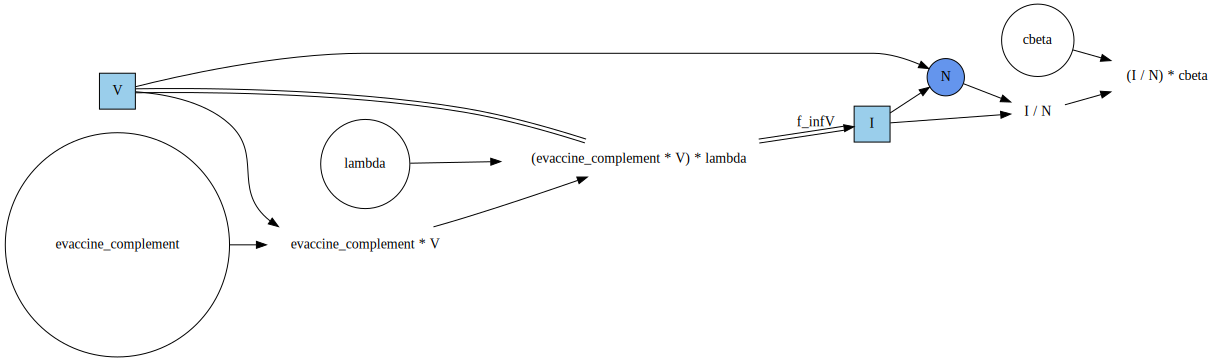

In [12]:
GraphF(L)

In [13]:
I = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta
    v_vacV = evaccine_complement * V
    v_infV = *(v_vacV)


    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;
     


StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:4, LV:2, LSV:1, P:2, LVV:2, LPV:2, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     V │
│ 2 │     I │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  4 │ f_infV │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
└───┴─────┴────┘
┌───┬────────┬─────┐
│ V │  vname │ vop │
├───┼────────┼─────┤
│ 1 │ v_inf₁ │   / │
│ 2 │ v_inf₂ │   * │
│ 3 │ v_vacV │   * │
│ 4 │ v_infV │   * │
└───┴────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           1 │
│  2 │   1 │   3 │           2 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬─────────────────────┐
│ P │               pname │
├───┼─────────────────────┤
│ 1 │               cbeta │
│ 2 │ evaccine_complement │
└───┴─────────────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
│   2 │     3 │     4 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    2 │            2 │
│   2 │    2 │    3 │            1 │
└─────┴──────┴──────┴──────────────┘

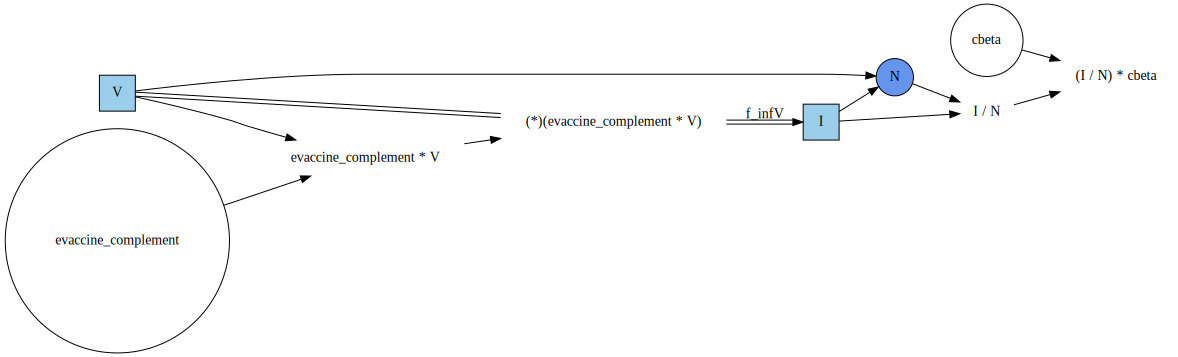

In [14]:
GraphF(I)

In [15]:
R = @stock_and_flow begin
    :stocks
    V
    I

    :parameters
    cbeta
    evaccine_complement

    :dynamic_variables
    v_inf₁ = I / N
    v_inf₂ = v_inf₁ * cbeta

    v_vacV = evaccine_complement * V

    v_infV = v_vacV * v_inf₂

    :flows
    V => f_infV(v_infV) => I

    :sums
    N = [V, I]
    end;
     


StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:4, LV:2, LSV:1, P:2, LVV:3, LPV:2, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     V │
│ 2 │     I │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  4 │ f_infV │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
└───┴─────┴────┘
┌───┬────────┬─────┐
│ V │  vname │ vop │
├───┼────────┼─────┤
│ 1 │ v_inf₁ │   / │
│ 2 │ v_inf₂ │   * │
│ 3 │ v_vacV │   * │
│ 4 │ v_infV │   * │
└───┴────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           1 │
│  2 │   1 │   3 │           2 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬─────────────────────┐
│ P │               pname │
├───┼─────────────────────┤
│ 1 │               cbeta │
│ 2 │ evaccine_complement │
└───┴─────────────────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
│   2 │     3 │     4 │             1 │
│   3 │     2 │     4 │             2 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    2 │            2 │
│   2 │    2 │    3 │            1 │
└─────┴──────┴──────┴──────────────┘

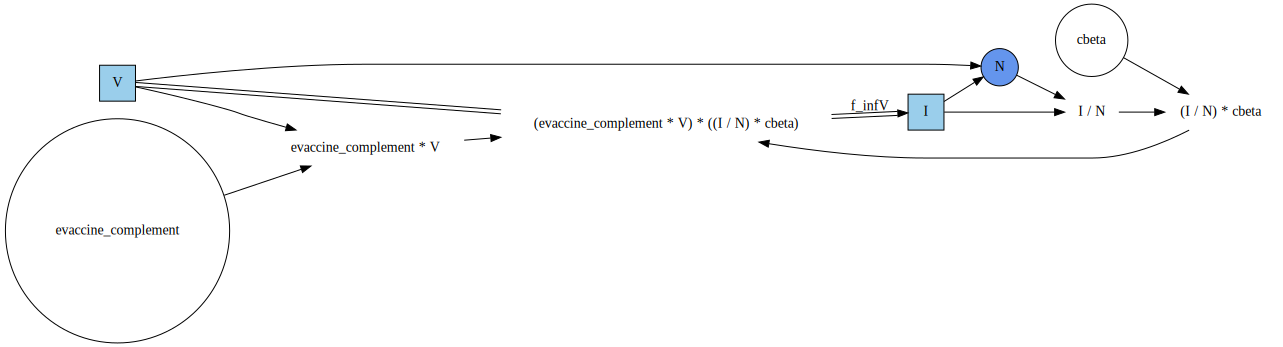

In [16]:
GraphF(R)

In [17]:
using AlgebraicRewriting
using AlgebraicRewriting: rewrite
const hom = Catlab.CategoricalAlgebra.homomorphism
rule = Rule(hom(I,L), hom(I,R))

Rule{:DPO}(ACSetTransformation((S = FinFunction([1, 2], 2, 2), SV = FinFunction([1], 1, 1), LS = FinFunction([1, 2], 2, 2), F = FinFunction([1], 1, 1), I = FinFunction([1], 1, 1), O = FinFunction([1], 1, 1), V = FinFunction([1, 2, 3, 4], 4, 4), LV = FinFunction([1, 2], 2, 2), LSV = FinFunction([1], 1, 1), P = FinFunction([2, 3], 2, 3), LVV = FinFunction([1, 2], 2, 2), LPV = FinFunction([1, 2], 2, 3), Name = VarFunction{Symbol}(FinDomFunction(Union{AttrVar, Symbol}[], FinSet(0), TypeSet(Union{AttrVar, Symbol})), FinSet(0)), Op = VarFunction{Symbol}(FinDomFunction(Union{AttrVar, Symbol}[], FinSet(0), TypeSet(Union{AttrVar, Symbol})), FinSet(0)), Position = VarFunction{Int8}(FinDomFunction(Union{AttrVar, Int8}[], FinSet(0), TypeSet(Union{AttrVar, Int8})), FinSet(0))), StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:4, LV:2, LSV:1, P:2, LVV:2, LPV:2, Name:0, Op:0, Position:0}, StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:4, LV:2, LSV:1, P:3, LVV:2, LPV:3, Name:0, Op:0, Position:0}), A

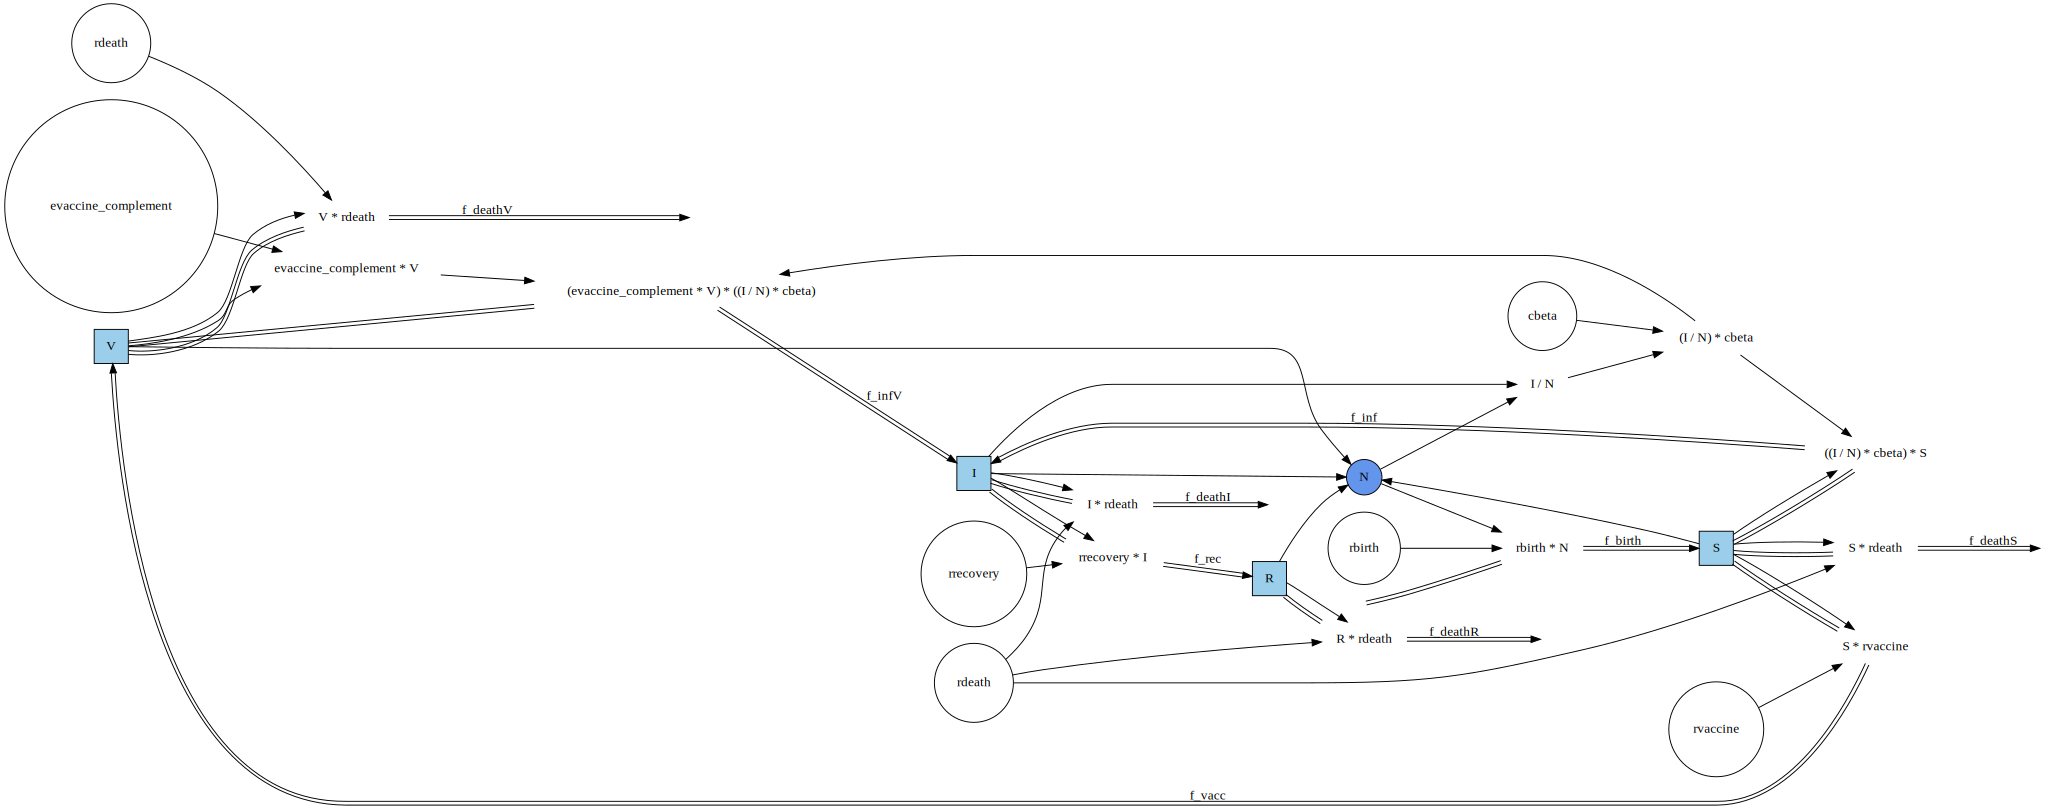

In [18]:
sirv_rewritten = rewrite(rule, sirv)
GraphF(sirv_rewritten)

In [19]:
# define values of constant parameters
p = LVector(
    cbeta=0.1, rbirth=0.001, rdeath=0.001, rrecovery=0.05, # for model sir
    rvaccine=0.01, evaccine=0.3, evaccine_complement = 0.7 # for model svi
)
# define initial values for stocks
u0 = LVector(
    S=990.0, I=10.0, R=0.0, V=0.0
)

4-element LArray{Float64, 1, Vector{Float64}, (:S, :I, :R, :V)}:
 :S => 990.0
 :I => 10.0
 :R => 0.0
 :V => 0.0

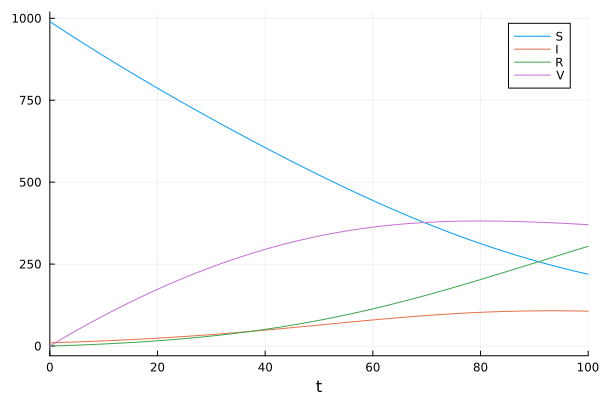

In [20]:
prob_sirv = ODEProblem(vectorfield(sirv_rewritten),u0,(0.0,100.0),p);
sol_sirv = solve(prob_sirv,Tsit5(),abstol=1e-8);
plot(sol_sirv)

In [21]:
# to have the figures plotted fix to the wider of the cells
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")


HTML{String}("<style>\n.output_svg div{\n  width: 100% !important;\n  height: 100% !important;\n}\n</style>\n")